# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Reditya Imanuel Yuwono
- **Email:** doeng2@gmail.com
- **ID Dicoding:** reditya

## Menentukan Pertanyaan Bisnis

- Bagaimana tren tingkat polusi udara (PM2.5) dalam beberapa tahun terakhir, dan stasiun mana yang mencatat rata-rata polusi tertinggi?
- Apakah terdapat korelasi antara kondisi cuaca (Suhu, Curah Hujan, Kecepatan Angin) dengan tingkat polusi PM2.5?

## Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## Data Wrangling

### Gathering Data

In [2]:
# Tentukan path folder tempat menyimpan file csv Anda
folder_path = "data" 

# Menggunakan glob untuk membaca semua file berakhiran .csv
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# List untuk menampung dataframe
df_list = []

for filename in all_files:
    df = pd.read_csv(filename)
    df_list.append(df)

# Menggabungkan semua data menjadi satu DataFrame utama
main_df = pd.concat(df_list, axis=0, ignore_index=True)

# Menampilkan 5 baris pertama
main_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Berhasil menyatukan dataset dari 13 file CSV berbeda.
- Dataset digabungkan menjadi satu DataFrame bernama main_df.
- Struktur awal data memiliki kolom terpisah untuk year, month, day, hour yang nantinya perlu disatukan menjadi tipe data datetime.

### Assessing Data

In [3]:
# Memeriksa info dataset (tipe data dan jumlah non-null)
print("Info Dataset:")
main_df.info()

# Memeriksa jumlah missing value di setiap kolom
print("\nMissing Values:")
print(main_df.isna().sum())

# Memeriksa duplikasi
print("\nDuplikasi Data:")
print(f"Jumlah data duplikat: {main_df.duplicated().sum()}")

# Melihat ringkasan statistik
print("\nDeskripsi Statistik:")
print(main_df.describe(include="all"))

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB

Missing Values:
No            

**Insight:**
- Missing Values: Terdapat missing values pada kolom polutan (PM2.5, PM10, SO2, NO2, CO, O3) dan data meteorologi (TEMP, PRES, DEWP, RAIN, wd, WSPM).
- Duplikasi: Tidak ditemukan duplikasi.

### Cleaning Data

In [4]:
# Menghapus kolom 'No' karena tidak diperlukan
if 'No' in main_df.columns:
    main_df.drop(columns=['No'], inplace=True)

# Menangani Missing Values
# Menggunakan metode imputasi agar distribusi data tetap terjaga dengan cara memberi nilai rata-rata pada kolom yang mengalami missing data.
cols_to_fill = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 
                'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for col in cols_to_fill:
    main_df[col] = main_df[col].fillna(main_df[col].mean())

# Untuk kolom kategorikal (wd = Wind Direction), menggunakan modus (nilai terbanyak)
main_df['wd'] = main_df['wd'].fillna(main_df['wd'].mode()[0])

# Mengubah kolom waktu menjadi tipe Datetime
main_df['datetime'] = pd.to_datetime(main_df[['year', 'month', 'day', 'hour']])

# Menghapus kolom year, month, day, hour yang lama
main_df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# Mengatur ulang urutan kolom agar datetime berada di awal
cols = ['datetime'] + [col for col in main_df.columns if col != 'datetime']
main_df = main_df[cols]

# Pengecekan ulang setelah cleaning
print("Jumlah Missing Values setelah cleaning:")
print(main_df.isna().sum())
print("\nInfo Dataset Terbaru:")
print(main_df.info())
print(main_df.head())

Jumlah Missing Values setelah cleaning:
datetime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

Info Dataset Terbaru:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  420768 non-null  datetime64[ns]
 1   PM2.5     420768 non-null  float64       
 2   PM10      420768 non-null  float64       
 3   SO2       420768 non-null  float64       
 4   NO2       420768 non-null  float64       
 5   CO        420768 non-null  float64       
 6   O3        420768 non-null  float64       
 7   TEMP      420768 non-null  float64       
 8   PRES      420768 non-null  float64       
 9   DEWP      420768 non-null  float64       
 10  RAIN      420768 non-null  float64       
 11  w

**Insight:**
- Efisiensi Kolom: Kolom 'No' serta kolom waktu terpisah ('year', 'month', 'day', 'hour') telah dihapus. Informasi waktu kini terpusat pada satu kolom datetime. Hal ini mengurangi dimensi data tanpa menghilangkan informasi penting.
- Penanganan Missing Values: Nilai kosong pada data polutan dan cuaca telah diimputasi menggunakan nilai rata-rata (mean) untuk menjaga distribusi data, sedangkan data kategorikal arah angin diisi dengan modus.

## Exploratory Data Analysis (EDA)

### Explore Geospatial

In [5]:
# Cek nama-nama stasiun yang ada di dataset
print("Daftar Stasiun:", main_df['station'].unique())

# Dictionary koordinat stasiun (Lat, Lon)
# Format: 'Nama_Stasiun': [Latitude, Longitude]
station_coords = {
    "Aotizhongxin": [39.982, 116.417],
    "Changping": [40.217, 116.230],
    "Dingling": [40.292, 116.220],
    "Dongsi": [39.929, 116.417],
    "Guanyuan": [39.929, 116.339],
    "Gucheng": [39.914, 116.184],
    "Huairou": [40.316, 116.632],
    "Nongzhanguan": [39.937, 116.461],
    "Shunyi": [40.127, 116.655],
    "Tiantan": [39.886, 116.407],
    "Wanliu": [39.987, 116.287],
    "Wanshouxigong": [39.878, 116.352]
}

# Fungsi untuk mengambil Latitude
def get_lat(station):
    return station_coords.get(station, [None, None])[0]

# Fungsi untuk mengambil Longitude
def get_lon(station):
    return station_coords.get(station, [None, None])[1]

# Terapkan ke DataFrame
main_df['lat'] = main_df['station'].apply(get_lat)
main_df['lon'] = main_df['station'].apply(get_lon)

# Cek hasil
print(main_df[['station', 'lat', 'lon']].head())

Daftar Stasiun: ['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']
        station     lat      lon
0  Aotizhongxin  39.982  116.417
1  Aotizhongxin  39.982  116.417
2  Aotizhongxin  39.982  116.417
3  Aotizhongxin  39.982  116.417
4  Aotizhongxin  39.982  116.417


**Insight:**
- Berhasil menambahkan kolom baru latitude dan longitude.
- Data baru ini sangat penting untuk fitur peta interaktif di dashboard Streamlit nanti, yang memungkinkan pengguna melihat persebaran polusi secara visual dengan menggunakan peta.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren tingkat polusi udara (PM2.5) dalam beberapa tahun terakhir, dan stasiun mana yang mencatat rata-rata polusi tertinggi?

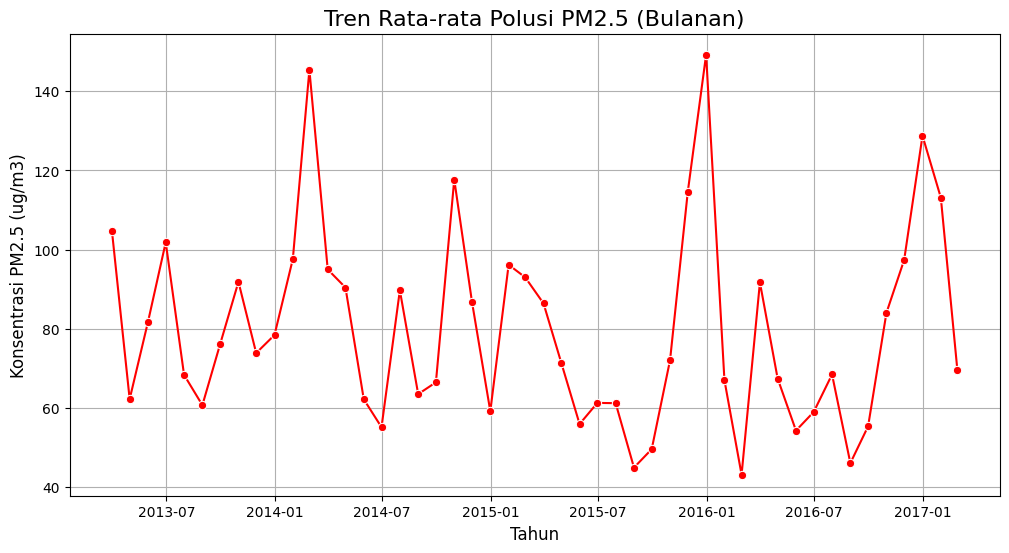

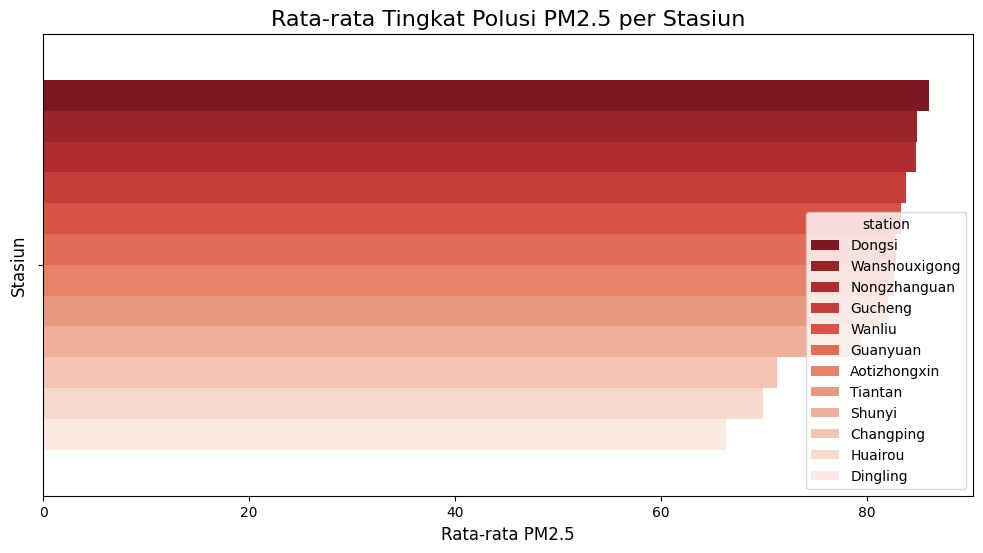

In [6]:
# Visualisasi A: Tren PM2.5 dari Waktu ke Waktu (Bulanan)
plt.figure(figsize=(12, 6))

# Resample data ke rata-rata bulanan agar plot lebih rapi
monthly_trend = main_df.resample('ME', on='datetime').mean(numeric_only=True)

sns.lineplot(data=monthly_trend, x=monthly_trend.index, y='PM2.5', marker='o', color='red')

plt.title('Tren Rata-rata Polusi PM2.5 (Bulanan)', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (ug/m3)', fontsize=12)
plt.grid(True)
plt.show()

# Visualisasi B: Rata-rata PM2.5 per Stasiun
plt.figure(figsize=(12, 6))

# Grouping berdasarkan stasiun dan mengurutkan dari yang tertinggi
station_avg = main_df.groupby('station')['PM2.5'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=station_avg, x='PM2.5', hue='station', palette='Reds_r')

plt.title('Rata-rata Tingkat Polusi PM2.5 per Stasiun', fontsize=16)
plt.xlabel('Rata-rata PM2.5', fontsize=12)
plt.ylabel('Stasiun', fontsize=12)
plt.show()

### Pertanyaan 2: Apakah terdapat korelasi antara kondisi cuaca (Suhu, Curah Hujan, Angin) dengan tingkat polusi PM2.5?

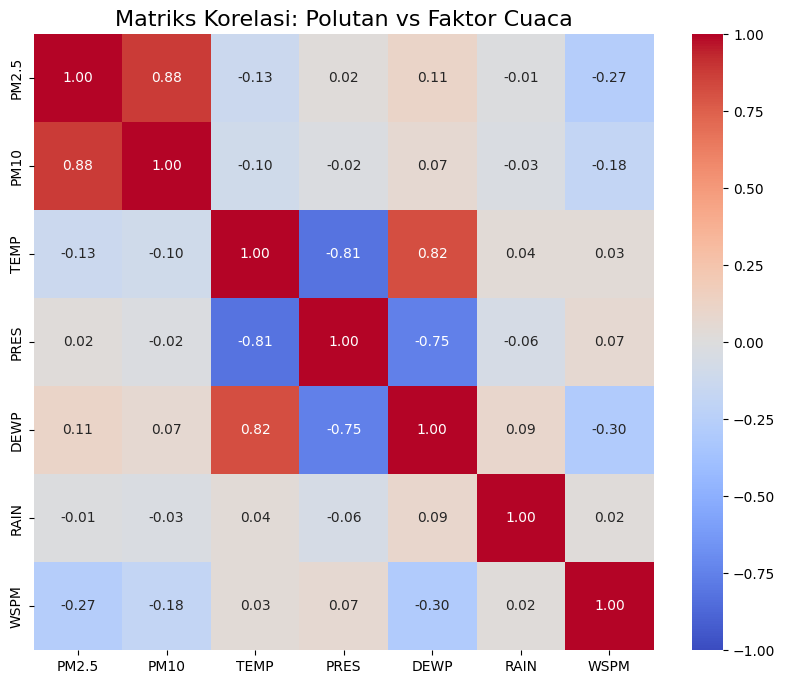

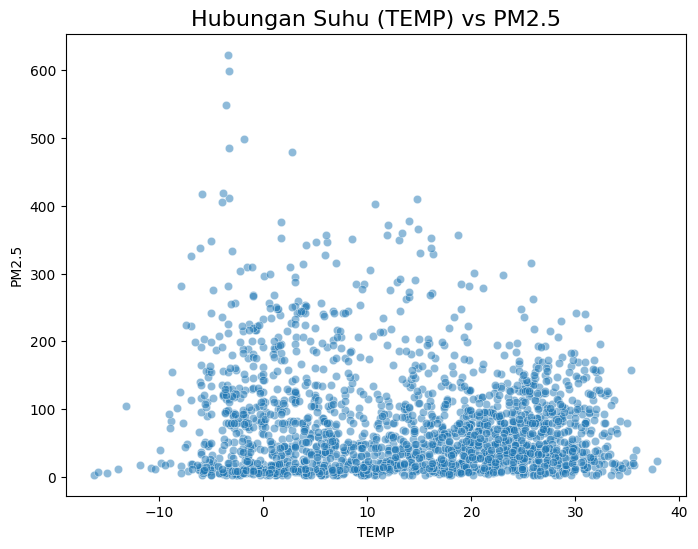

In [7]:
# Memilih kolom yang relevan untuk korelasi
corr_cols = ['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
corr_matrix = main_df[corr_cols].corr()

# Plot Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriks Korelasi: Polutan vs Faktor Cuaca', fontsize=16)
plt.show()

# Scatter Plot: PM2.5 vs TEMP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=main_df.sample(2000), x='TEMP', y='PM2.5', alpha=0.5) # Menggunakan sample agar plot tidak berat
plt.title('Hubungan Suhu (TEMP) vs PM2.5', fontsize=16)
plt.show()

**Insight:**
- Terdapat pola musiman yang terjadi tiap musim dingin dan menurun di musim panas, dan untuk tren jangka panjangnya mengalami penurunan di Tahun 2017.
- Stasiun Dongsi mencatat bahwa kota tersebut memiliki kualitas udara yang sangat buruk. Informasi tersebut berguna untuk pemerintah menentukan fokus area penanggulangan polusi.
- Terdapat korelasi negatif yang diakibatkan oleh polutan dengan cuaca, dikarenakan dengan adanya faktor cuaca dapat menurunkan polutan.
- Pada scatter plot dapat dilihat bahwa ditemukan polutan yang tinggi saat suhu rendah yang mungkin diakibatkan peningkatan pembakaran batu bara yang digunakan untuk pemanas saat suhu rendah.

## Analisis Lanjutan (Opsional)

In [8]:
# Sudah dilakukan di Exploratory Data Analysis
# Menyimpan dataframe yang sudah bersih ke file CSV
output_folder = "dashboard"
output_path = os.path.join(output_folder, "main_data.csv")

main_df.to_csv(output_path, index=False)

print(f"Data berhasil diekspor ke: {output_path}")

Data berhasil diekspor ke: dashboard\main_data.csv


## Conclusion

### Conclution pertanyaan 1 "Bagaimana tren tingkat polusi udara (PM2.5) dalam beberapa tahun terakhir, dan stasiun mana yang mencatat rata-rata polusi tertinggi?"
Berdasarkan hasil eksplorasi data dan visualisasi, dapat disimpulkan bahwa:

1. **Pola Musiman yang Kuat**: Terdapat tren musiman yang konsisten di mana tingkat polusi udara (PM2.5) melonjak drastis pada musim dingin (akhir dan awal tahun) dan cenderung menurun/membaik pada musim panas. Hal ini kemungkinan besar disebabkan oleh faktor meteorologi (inversi suhu) dan peningkatan aktivitas pembakaran untuk pemanas ruangan saat musim dingin.

2. **Identifikasi Zona Merah***: Stasiun Dongsi tercatat sebagai wilayah dengan rata-rata tingkat polusi tertinggi, menjadikannya prioritas utama untuk intervensi kebijakan lingkungan. Sebaliknya, stasiun Dingling memiliki kualitas udara yang relatif lebih bersih, kemungkinan karena lokasinya yang berada di area suburban atau dekat pegunungan yang jauh dari pusat kemacetan kota. 

### Conclution pertanyaan 2 "Apakah terdapat korelasi antara kondisi cuaca (Suhu, Curah Hujan, Angin) dengan tingkat polusi PM2.5?"
Analisis korelasi menunjukkan hubungan yang signifikan antara faktor meteorologi dengan tingkat polusi:

1. **Korelasi Negatif (Pembersihan Alami)**: Terdapat korelasi negatif antara PM2.5 dengan Suhu (TEMP) dan Kecepatan Angin (WSPM). Artinya, semakin tinggi suhu atau semakin kencang angin berhembus, tingkat polusi cenderung menurun.
    - Angin berfungsi membantu menyebarkan (dispersi) polutan agar tidak menumpuk di satu area.
    - Suhu rendah seringkali berkaitan dengan fenomena inversi suhu yang menjebak polutan di dekat permukaan tanah, sehingga saat suhu naik, polutan lebih mudah terurai ke atmosfer atas.

2. **Implikasi**: Cuaca memainkan peran krusial dalam dinamika polusi udara. Kondisi "udara tenang" (angin pelan) dan suhu dingin adalah kondisi terburuk yang memicu akumulasi polusi berbahaya.